In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import os


In [2]:
# Directory path containing the ROOT files
directory_path = '/eos/purdue/store/user/lingqian/fullrun2_eft_minitrees/spinCorrInput_2016preVFP/Nominal'

# Define the specific files you want to include (with subdirectories)
desired_files = [
    'ee/ee_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'ee/ee_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'ee/ee_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root',
    
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root'
]

# Construct the full paths for the desired files
file_paths = [os.path.join(directory_path, filename) for filename in desired_files]

# Open each ROOT file and extract the 'ttBar_treeVariables_step8' TTree
trees = [uproot.open(file_path)['ttBar_treeVariables_step0'] for file_path in file_paths]

# Concatenate the TTrees from all files into a single TTree
file = uproot.concatenate(trees)

In [3]:
#list of observables that you want to plot 
observable = [
    'gen_top_pt',
    'gen_top_phi',
    'gen_top_rapidity',
    'gen_top_eta',
    'gen_top_mass',
    'gen_tbar_pt',
    'gen_tbar_phi',
    'gen_tbar_rapidity',
    'gen_tbar_eta',
    'gen_tbar_mass',
    'gen_l_pt',
    'gen_l_eta',
    'gen_l_phi',
    'gen_l_mass',
    'gen_l_pdgid',
    'gen_final_l_pt',
    'gen_final_l_eta',
    'gen_final_l_phi',
    'gen_final_l_mass',
    'gen_final_l_pdgid',
    'gen_lbar_pt',
    'gen_lbar_eta',
    'gen_lbar_phi',
    'gen_lbar_mass',
    'gen_lbar_pdgid',
    'gen_final_lbar_pt',
    'gen_final_lbar_eta',
    'gen_final_lbar_phi',
    'gen_final_lbar_mass',
    'gen_final_lbar_pdgid',
    'gen_b_pt',
    'gen_b_eta',
    'gen_b_phi',
    'gen_b_mass',
    'gen_bbar_pt',
    'gen_bbar_eta',
    'gen_bbar_phi',
    'gen_bbar_mass',
    'gen_nu_pt',
    'gen_nu_eta',
    'gen_nu_phi',
    'gen_nu_mass',
    'gen_nubar_pt',
    'gen_nubar_eta',
    'gen_nubar_phi',
    'gen_nubar_mass',
    'gen_ttbar_pt',
    'gen_ttbar_phi',
    'gen_ttbar_rapidity',
    'gen_ttbar_eta',
    'gen_ttbar_delta_phi',
    'gen_ttbar_delta_eta',
    'gen_ttbar_delta_rapidity',
    'gen_ttbar_mass',
    'gen_llbar_pt',
    'gen_llbar_phi',
    'gen_llbar_rapidity',
    'gen_llbar_delta_phi',
    'gen_llbar_delta_eta',
    'gen_llbar_delta_rapidity',
    'gen_llbar_mass',
    'gen_b1k',
    'gen_b2k',
    'gen_b1j',
    'gen_b2j',
    'gen_b1r',
    'gen_b2r',
    'gen_b1q',
    'gen_b2q',
    'gen_b1n',
    'gen_b2n',
    'gen_c_kk',
    'gen_c_rr',
    'gen_c_nn',
    'gen_c_kj',
    'gen_c_rq',
    'gen_c_rk',
    'gen_c_kr',
    'gen_c_nr',
    'gen_c_rn',
    'gen_c_nk',
    'gen_c_kn',
    'gen_c_rj',
    'gen_c_jr',
    'gen_ll_cHel',
    'gen_ll_cLab',
    'gen_ll_kNorm',
    'gen_ll_rNorm',
    'eventWeight',
    'trueLevelWeight',
    'mgWeights'
]

In [361]:
import Event_weight_prediction
import numpy as np
import Computed_Statistics_chi_square

#masking
mask_file = (file['gen_l_pt'] > 0) & (file['gen_lbar_pt'] > 0)

#compute the event weight for your desired ctg_value and apply masking as well 
path_to_SC='/depot/cms/top/bhanda25/EFT_minitree/Stored_SC/Stored_SC_541k.npy'

even_weight_ctgRe, weight_sm =Computed_Statistics_chi_square.compute_event_weights_ctgRe(file, path_to_SC, ctgRe_min=-1, ctgRe_max=1, num_points=7)


In [385]:
import Chi_square_test_stat

# Define binning and list of observables
bins = 6
observables = ['gen_ll_cHel']#, 'gen_llbar_delta_phi'] # List of observables
x_label=['$cos\phi$']#,'$\Delta \phi_{ll}$']
# Compute test statistics for multiple observables
hist_sm_list, hist_sm_err_list, eft_events, eft_errors, bin_edges = Chi_square_test_stat.compute_values_for_chi_square(
    [file[observable][mask_file] for observable in observables],  # Pass a list of observables
    weight_sm, 
    even_weight_ctgRe,
    bins
)

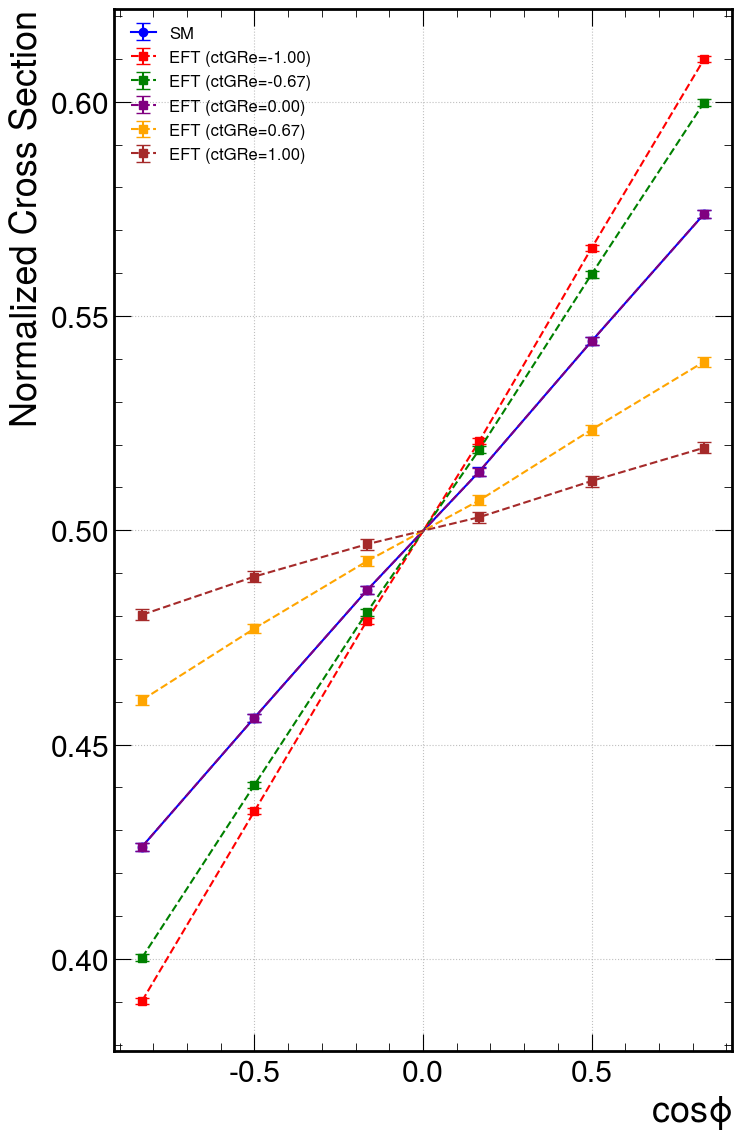

In [386]:
import Plot_SM_vs_EFT_7
Plot_SM_vs_EFT_7.plot_sm_vs_eft_histograms(
    observables,
    bin_edges, 
    hist_sm_list, 
    hist_sm_err_list, 
    eft_events, 
    eft_errors,
    x_label,
    legend_sizes=12
)


In [387]:
import Chi_square_test_stat
# Compute Chi-square for each EFT variation and observable
chi_square_stat = {}

for ctgRe_value, hist_eft_list in eft_events.items():
    hist_eft_err_list = eft_errors[ctgRe_value]
    
    # Compute Chi-square for this ctGRe variation using the corrected function
    chi_square_value = Chi_square_test_stat.compute_chi_square(
        hist_sm_list, hist_sm_err_list, hist_eft_list, hist_eft_err_list, bins
    )
    
    # Store the chi-square value for this ctGRe variation
    chi_square_stat[ctgRe_value] = chi_square_value  # No need for further averaging


In [388]:
chi_square_stat

{-1.0: 523.3320792758566,
 -0.6666666666666667: 250.35502776638901,
 -0.33333333333333337: 66.52614352613114,
 0.0: 4.6167505450460907e-07,
 0.33333333333333326: 71.8199088545606,
 0.6666666666666665: 291.1404796615069,
 1.0: 652.335361093259}

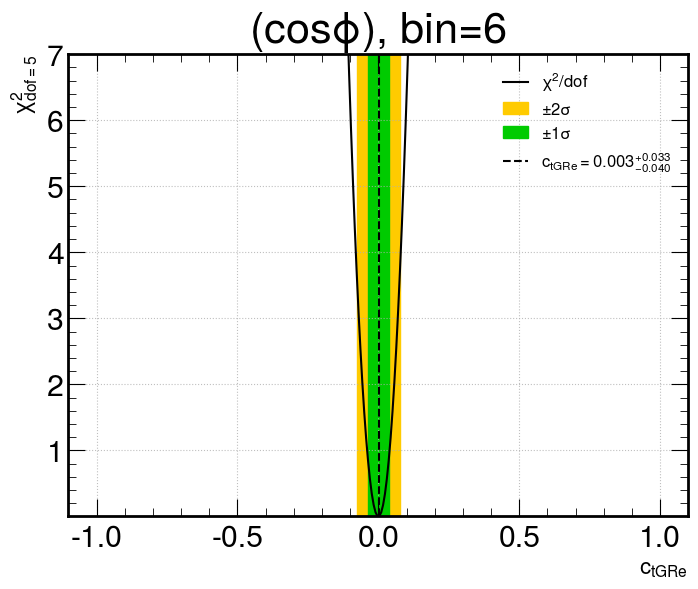

In [390]:
import Plot_limit_2

ylabel_chi='$\chi^2_{dof=5}$'
varaibles='$cos \phi$'#,$\Delta \phi_{ll}$'
Plot_limit_2.plot_limit(chi_square_stat, ylabel_chi, bins, varaibles)

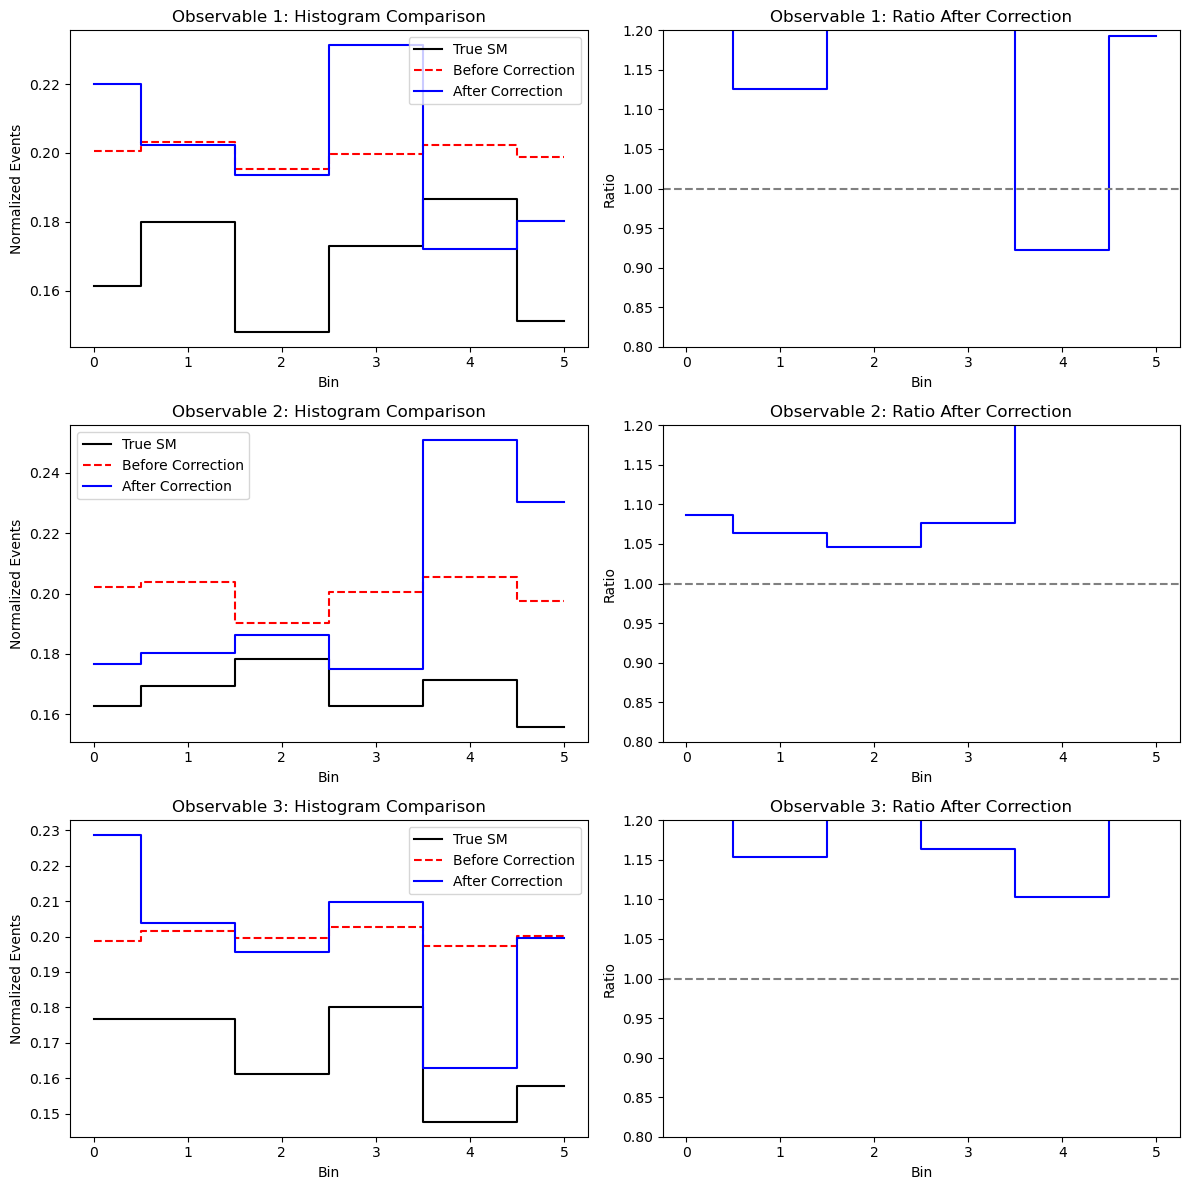

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 3 observables with 6 bins each
np.random.seed(42)
num_bins = 6
num_observables = 3
num_events = 10000

# Simulated true SM histograms (normalized)
hist_true = [np.random.poisson(100, num_bins).astype(float) for _ in range(num_observables)]
hist_true = [h / np.sum(h) for h in hist_true]

# Simulated reweighted SM histograms (biased)
hist_rw = [h * np.random.uniform(0.8, 1.2, num_bins) for h in hist_true]
hist_rw = [h / np.sum(h) for h in hist_rw]

# Simulated per-event observable values for reweighted SM
observable_vals = [np.random.choice(np.arange(num_bins), size=num_events) for _ in range(num_observables)]

# Initial event weights
event_weights = np.ones(num_events)

# Store weights at each iteration for visualization
weights_per_iter = [event_weights.copy()]

# Sequential correction using SFs
for i in range(num_observables):
    sf = np.divide(hist_true[i], hist_rw[i], out=np.ones_like(hist_true[i]), where=hist_rw[i] != 0)
    bin_idx = observable_vals[i]
    sf_event = sf[bin_idx]
    event_weights = event_weights * sf_event
    weights_per_iter.append(event_weights.copy())

# Plot final histogram comparison for each observable
fig, axes = plt.subplots(num_observables, 2, figsize=(12, 4 * num_observables))

for i in range(num_observables):
    ax1, ax2 = axes[i]
    # Histogram before any correction
    h0, _ = np.histogram(observable_vals[i], bins=num_bins, weights=weights_per_iter[0], density=True)
    # Histogram after all corrections
    hN, _ = np.histogram(observable_vals[i], bins=num_bins, weights=weights_per_iter[-1], density=True)
    x = np.arange(num_bins)

    ax1.step(x, hist_true[i], label="True SM", color='black', where='mid')
    ax1.step(x, h0, label="Before Correction", linestyle='--', color='red', where='mid')
    ax1.step(x, hN, label="After Correction", linestyle='-', color='blue', where='mid')
    ax1.set_title(f"Observable {i+1}: Histogram Comparison")
    ax1.legend()
    ax1.set_xlabel("Bin")
    ax1.set_ylabel("Normalized Events")

    ratio = np.divide(hN, hist_true[i], out=np.ones_like(hN), where=hist_true[i] != 0)
    ax2.step(x, ratio, label="Corrected / True", color='blue', where='mid')
    ax2.axhline(1, color='gray', linestyle='--')
    ax2.set_ylim(0.8, 1.2)
    ax2.set_title(f"Observable {i+1}: Ratio After Correction")
    ax2.set_xlabel("Bin")
    ax2.set_ylabel("Ratio")

plt.tight_layout()
plt.show()
